In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text


In [2]:
fights = pd.read_csv("ufcFights.csv")
fighters = pd.read_csv("ufcFighters.csv")


In [3]:
# Filter title fights where the winner (fighter1_id) won
champions = fights[(fights["title_fight"] == "Yes") & (fights["outcome"] == "win")]["fighter1_id"].unique()
# Get champion details from the fighters table
champion_data = fighters[fighters["fighter_id"].isin(champions)]
# Sort by highest Elo
champion_data = champion_data.sort_values(by="highestElo", ascending=False)
champion_data['win_percentage'] = champion_data['wins'] / (champion_data['wins'] + champion_data['losses'])
top_champions = champion_data.nlargest(50, "highestElo")
print(top_champions)



      fighter_id                   name           weightclass  wins  losses  \
1437        1438        Islam Makhachev           Lightweight    16       1   
595          596              Jon Jones     Light Heavyweight    22       2   
1356        1357           Leon Edwards          Welterweight    15       4   
1454        1455           Kamaru Usman          Welterweight    15       3   
309          310      Georges St-Pierre          Welterweight    20       2   
749          750       Charles Oliveira           Lightweight    23      11   
1551        1552         Belal Muhammad          Welterweight    15       4   
928          929           Max Holloway         Featherweight    22       8   
1611        1612  Alexander Volkanovski           Lightweight    13       3   
1079        1080         Daniel Cormier           Heavyweight    12       3   
880          881           Stipe Miocic           Heavyweight    14       5   
1759        1760        Israel Adesanya          Mid

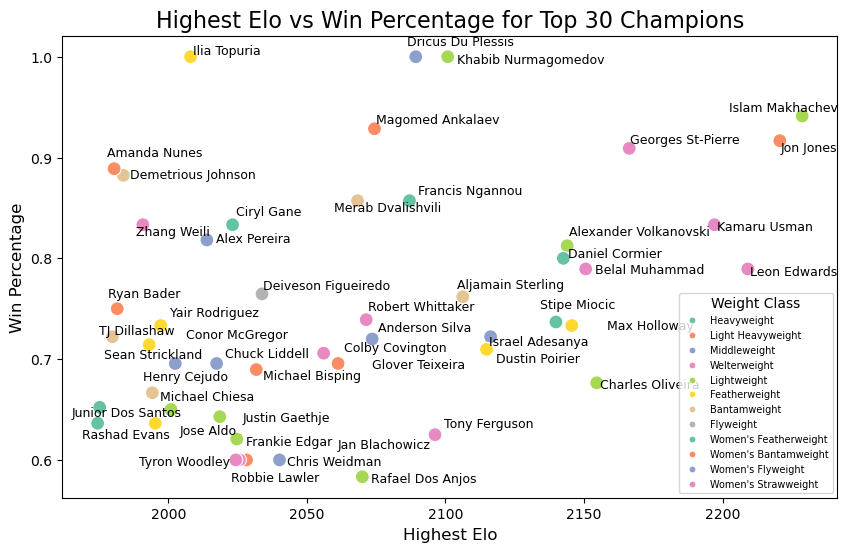

In [17]:
weight_classes = top_champions["weightclass"].unique()
color_palette = sns.color_palette("husl", len(weight_classes))  # Husl = Distinct colors
weight_class_colors = {wc: color_palette[i] for i, wc in enumerate(weight_classes)}
weight_class_order = [
    'Heavyweight', 'Light Heavyweight', 'Middleweight', 'Welterweight', 'Lightweight',
    'Featherweight', 'Bantamweight', 'Flyweight',
    'Women\'s Featherweight', 'Women\'s Bantamweight', 'Women\'s Flyweight', 'Women\'s Strawweight',
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_champions, x='highestElo', y='win_percentage', hue='weightclass', 
                palette='Set2', s=100, hue_order=weight_class_order)

# Add labels and title
plt.title('Highest Elo vs Win Percentage for Top 30 Champions', fontsize=16)
plt.xlabel('Highest Elo', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)

# Adjust legend
plt.legend(title="Weight Class", loc='lower right', fontsize=7, markerscale=0.5)

# Adjust the text labels (if needed)
texts = [plt.text(row['highestElo'], row['win_percentage'], row['name'], size=9) for _, row in top_champions.iterrows()]
adjust_text(texts)

# Show the plot
plt.show()